In [1]:
import pandas as pd
import numpy as np

g1 = pd.read_pickle('exp2_gfs_pbl1_d3.pk')
g2 = pd.read_pickle('exp2_gfs_pbl2_d3.pk')
n1 = pd.read_pickle('exp2_nam_pbl1_d3.pk')
n2 = pd.read_pickle('exp2_nam_pbl2_d3.pk')

g1p = g1.interpolate(limit=99)
g2p = g2.interpolate(limit=99)
n1p = n1.interpolate(limit=99)
n2p = n2.interpolate(limit=99)

FileNotFoundError: [Errno 2] No such file or directory: 'exp2_gfs_pbl1_d3.pk'

In [ ]:
print(g1['w10'].shape, g1['s30'].shape)
g1['w10']

In [3]:
%%latex
$$ Bias = \sum\limits_{i=1}^n \dfrac{(Obs_i - Fcst_i)}{n} $$ 
$$ $$
$$ MAE = \sum\limits_{i=1}^n \dfrac{\left|(Obs_i - Fcst_i)\right|}{n} $$ 
$$ $$
$$ RMSE = \sqrt{\sum\limits_{i=1}^n \dfrac{(Obs_i - Fcst_i)^2}{n}}$$
$$ $$
$$ R = \dfrac{C_{Obs}}{\sqrt{C_{Obs} * C_{Fcst}}} $$
$$\text{R is the Pearson coeficient where C is the covariance}$$

<IPython.core.display.Latex object>

In [120]:
def vertprof(model):    
    import matplotlib.pyplot as plt
    timeArray=np.arange(np.datetime64('2013-03-01'), np.datetime64('2013-03-08 01'),np.timedelta64(12,'h'))
    
    dfw = (model['w10'], model['w20'], model['w30'], model['w50'], model['w100'], model['w150'], model['w200'], model['w250'], model['w300'], model['w350'])
    fig = plt.figure(figsize=(12,6))
    cont = plt.contourf(dfw, cmap='rainbow')
    cbar = plt.colorbar(cont)
    xlabels = timeArray
    plt.xticks(np.arange(0,1+48*7,24), xlabels, rotation=45)
    levels = [10, 20, 30, 50, 100, 150, 200, 250, 300, 350]
    plt.yticks(np.arange(10), levels)
    plt.title('WRF' )   ####
    fig.autofmt_xdate()
    
   

NAM PBL1
NAM PBL2


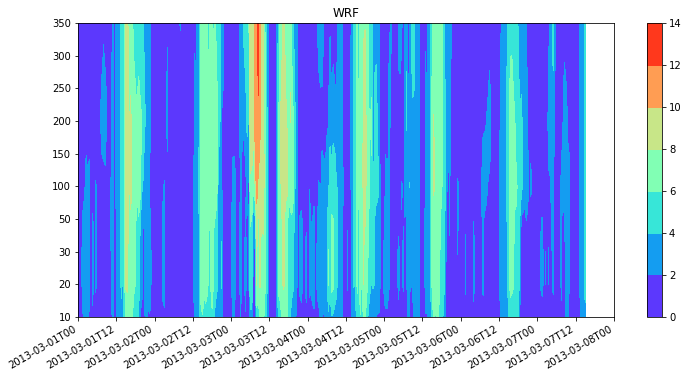

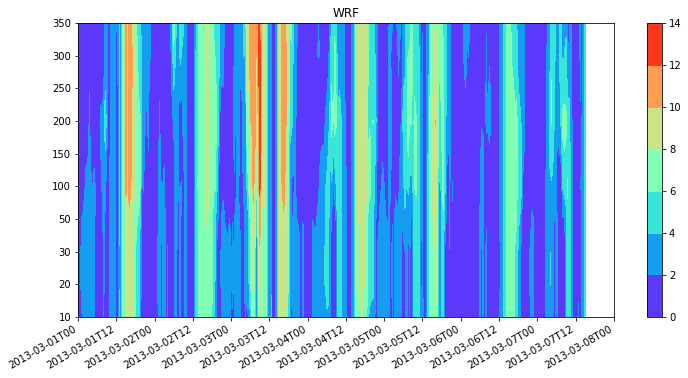

In [123]:
print('NAM PBL1')
vertprof(n1)
print('NAM PBL2')
vertprof(n2)


GFS PBL1
GFS PBL2


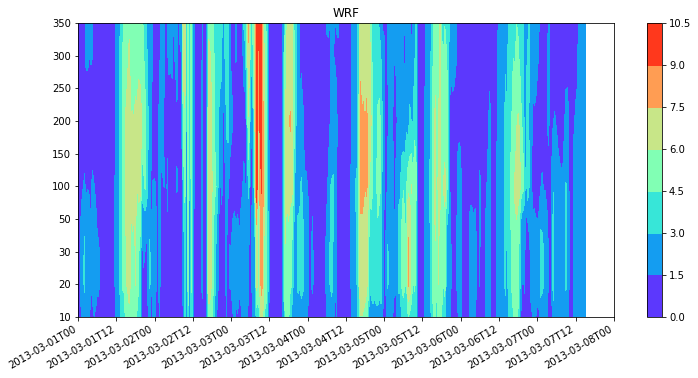

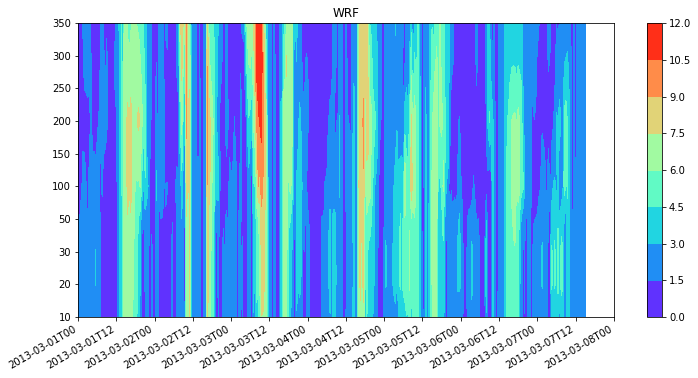

In [124]:
print('GFS PBL1')
vertprof(g1)
print('GFS PBL2')
vertprof(g2)

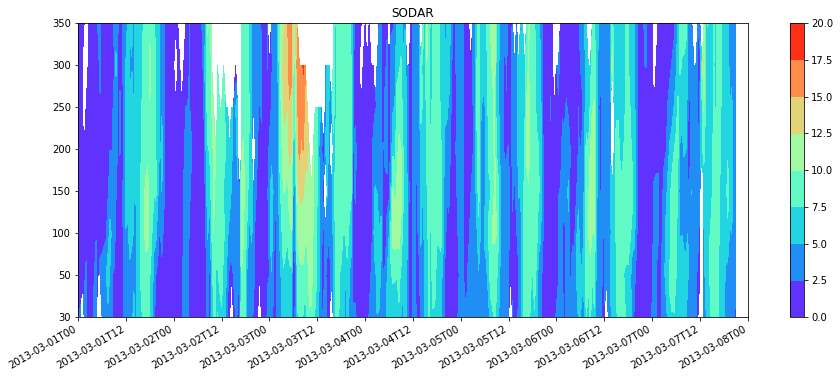

In [125]:
import matplotlib.pyplot as plt
timeArray=np.arange(np.datetime64('2013-03-01'), np.datetime64('2013-03-08 01'),np.timedelta64(12,'h'))
dfw = (g1['s30'], g1['s50'], g1['s100'], g1['s150'], g1['s200'], g1['s250'], g1['s300'], g1['s350'])
fig = plt.figure(figsize=(15,6))
cont = plt.contourf(dfw, cmap='rainbow')

cbar = plt.colorbar(cont)
xlabels = timeArray
plt.xticks(np.arange(0,1+48*7,24), xlabels, rotation=10)
levels = [30, 50, 100, 150, 200, 250, 300, 350]
plt.yticks(np.arange(8), levels)
plt.title('SODAR')
fig.autofmt_xdate()


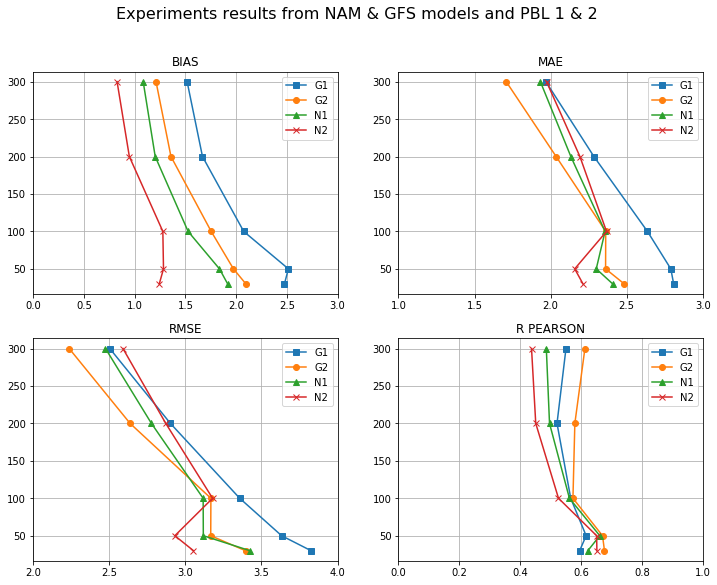

In [10]:
import matplotlib.pyplot as plt
levels = [30, 50, 100, 200, 300]
plt.figure(figsize=(12,9) )
 
plt.suptitle('Experiments results from NAM & GFS models and PBL 1 & 2', fontsize=16)

plt.subplot(221)
plt.title('BIAS')
plt.plot(g1s['BIAS'], levels, label='G1', marker="s")
plt.plot(g2s['BIAS'], levels, label='G2', marker="o")
plt.plot(n1s['BIAS'], levels, label='N1', marker="^")
plt.plot(n2s['BIAS'], levels, label='N2', marker="x")
plt.xticks(np.arange(0,3.5,0.5))
plt.legend()
plt.grid()

plt.subplot(222)
plt.title('MAE')
plt.plot(g1s['MAE'], levels, label='G1', marker="s")
plt.plot(g2s['MAE'], levels, label='G2', marker="o")
plt.plot(n1s['MAE'], levels, label='N1', marker="^")
plt.plot(n2s['MAE'], levels, label='N2', marker="x")
plt.xticks(np.arange(1,3.5,0.5))
plt.legend()
plt.grid()

plt.subplot(223)
plt.title('RMSE')
plt.plot(g1s['RMSE'], levels, label='G1', marker="s")
plt.plot(g2s['RMSE'], levels, label='G2', marker="o")
plt.plot(n1s['RMSE'], levels, label='N1', marker="^")
plt.plot(n2s['RMSE'], levels, label='N2', marker="x")
plt.xticks(np.arange(2,4.5,0.5))
plt.legend()
plt.grid()

plt.subplot(224)
plt.title('R PEARSON')
#plt.plot(g2s['COV'], levels, label='COV', marker="s")
plt.plot(g1s['R'], levels, label='G1', marker="s")
plt.plot(g2s['R'], levels, label='G2', marker="o")
plt.plot(n1s['R'], levels, label='N1', marker="^")
plt.plot(n2s['R'], levels, label='N2', marker="x")
plt.xticks(np.arange(0,1.1,0.2))
plt.legend()
plt.grid()

plt.show()

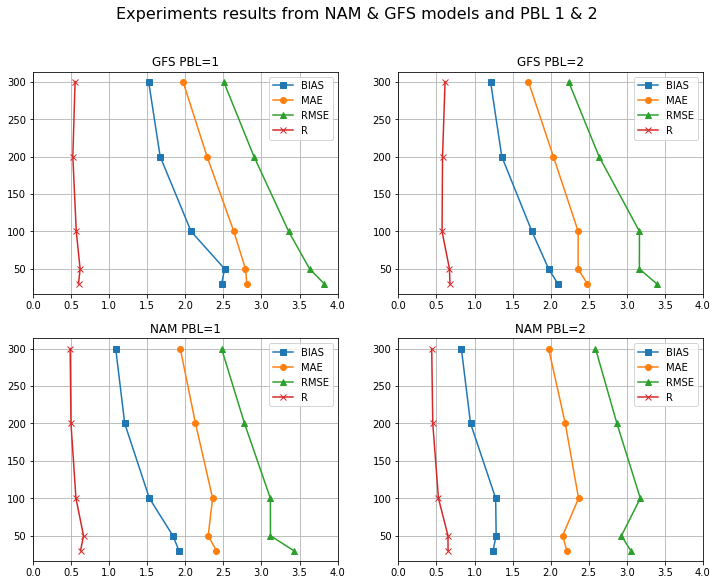

In [9]:
import matplotlib.pyplot as plt
levels = [30, 50, 100, 200, 300]
plt.figure(figsize=(12,9) )
 
plt.suptitle('Experiments results from NAM & GFS models and PBL 1 & 2', fontsize=16)
plt.subplot(221)
plt.title('GFS PBL=1')
plt.plot(g1s['BIAS'], levels, label='BIAS', marker="s")
plt.plot(g1s['MAE'], levels, label='MAE', marker="o")
plt.plot(g1s['RMSE'], levels, label='RMSE', marker="^")
#plt.plot(g1s['COV'], levels, label='COV', marker=".")
plt.plot(g1s['R'], levels, label='R', marker="x")
plt.xticks(np.arange(0,4.5,0.5))
plt.legend()
plt.grid()

plt.subplot(222)
plt.title('GFS PBL=2')
plt.plot(g2s['BIAS'], levels, label='BIAS', marker="s")
plt.plot(g2s['MAE'], levels, label='MAE', marker="o")
plt.plot(g2s['RMSE'], levels, label='RMSE', marker="^")
#plt.plot(g2s['COV'], levels, label='COV', marker=".")
plt.plot(g2s['R'], levels, label='R', marker="x")
plt.xticks(np.arange(0,4.5,0.5))
plt.legend()
plt.grid()

plt.subplot(223)
plt.title('NAM PBL=1')
plt.plot(n1s['BIAS'], levels, label='BIAS', marker="s")
plt.plot(n1s['MAE'], levels, label='MAE', marker="o")
plt.plot(n1s['RMSE'], levels, label='RMSE', marker="^")
#plt.plot(n1s['COV'], levels, label='COV', marker=".")
plt.plot(n1s['R'], levels, label='R', marker="x")
plt.xticks(np.arange(0,4.5,0.5))
plt.legend()
plt.grid()

plt.subplot(224)
plt.title('NAM PBL=2')
plt.plot(n2s['BIAS'], levels, label='BIAS', marker="s")
plt.plot(n2s['MAE'], levels, label='MAE', marker="o")
plt.plot(n2s['RMSE'], levels, label='RMSE', marker="^")
#plt.plot(g2s['COV'], levels, label='COV', marker="s")
plt.plot(n2s['R'], levels, label='R', marker="x")
plt.xticks(np.arange(0,4.5,0.5))
plt.legend()
plt.grid()

plt.show()

In [11]:
model = e300, e200, e100, e50, e30 =model['s300']-model['w300'], \
         model['s200']-model['w200'], model['s100']-model['w100'], model['s50']-model['w50'], model['s30']-model['w30']

NameError: name 'e300' is not defined

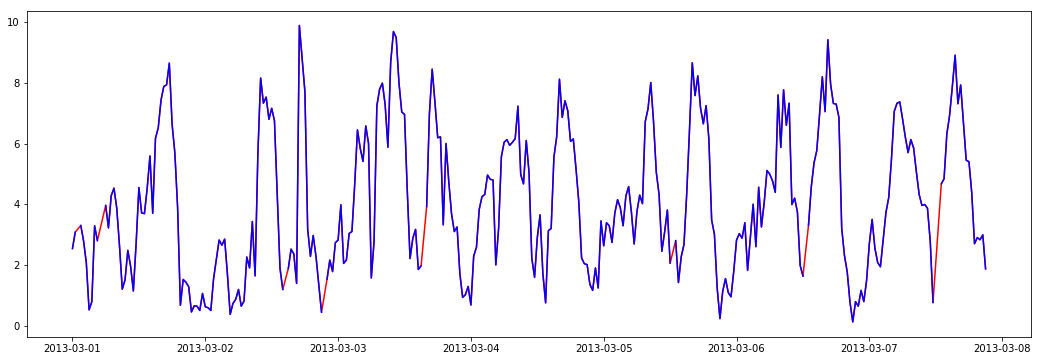

In [68]:
plt.figure(figsize=(18,6) )
plt.plot(g1p['s30'], label='G1', color='r')
plt.plot(g1['s30'], label='G1', color='b')


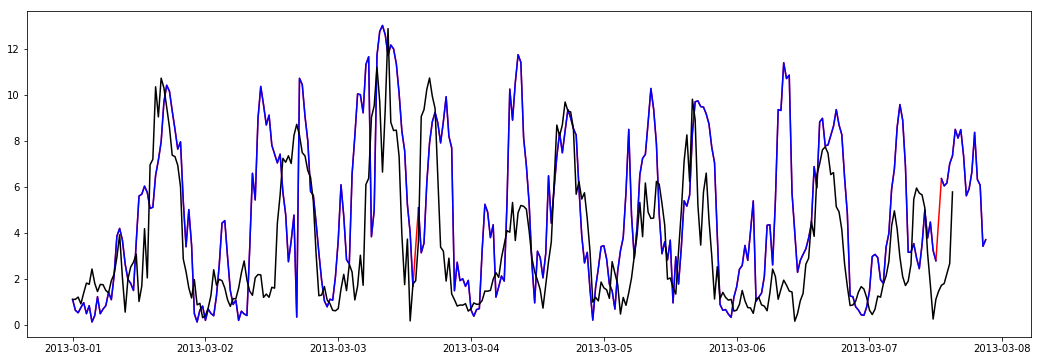

In [76]:
plt.figure(figsize=(18,6) )
plt.plot(g1p['s150'], label='G1', color='r')
plt.plot(g1['s150'], label='G1', color='b')
plt.plot(n2['w150'], label='G1', color='black')


(array([ 5., 17., 46., 62., 71., 55., 42., 18., 11.,  4.]),
 array([-3.42507799, -2.34642781, -1.26777763, -0.18912745,  0.88952273,
         1.96817292,  3.0468231 ,  4.12547328,  5.20412346,  6.28277364,
         7.36142382]),
 <a list of 10 Patch objects>)

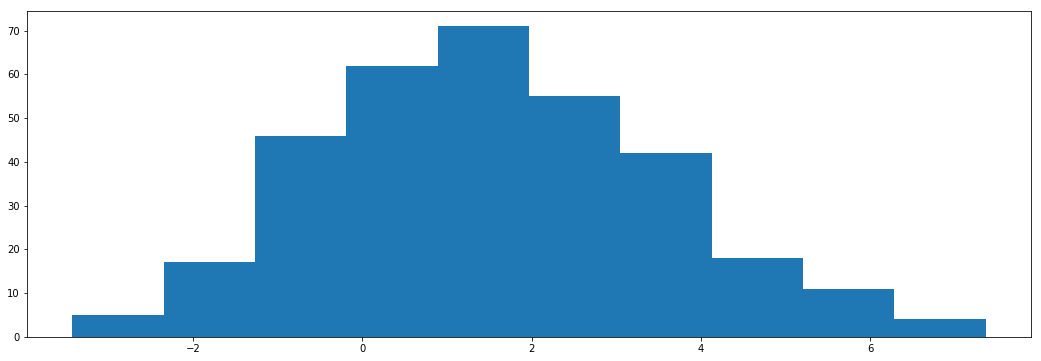

In [78]:
plt.figure(figsize=(18,6))
g1e30 = g1p['s30']-g1p['w30']
g2e30 = g2p['s30']-g2p['w30']
n1e30 = n1p['s30']-n1p['w30']
n2e30 = n2p['s30']-n2p['w30']


In [159]:
def media(level):
    import datetime as dt
    import numpy as np
    #times = np.arange(np.datetime64('2017-01-01 00'), np.datetime64('2017-01-02 00'), np.timedelta64(1, 'h'))
    times = np.arange(0,24,1)
    plt.plot(times, g1p['s'+str(level)].groupby(g1p.index.hour).mean(), linewidth=3)
    plt.plot(times, g1p['s'+str(level)].groupby(g1p.index.hour).mean())
    plt.plot(times, g2p['s'+str(level)].groupby(g1p.index.hour).mean())
    plt.plot(times, n1p['s'+str(level)].groupby(g1p.index.hour).mean())
    plt.plot(times, n2p['s'+str(level)].groupby(g1p.index.hour).mean())
    plt.xticks(rotation=30)

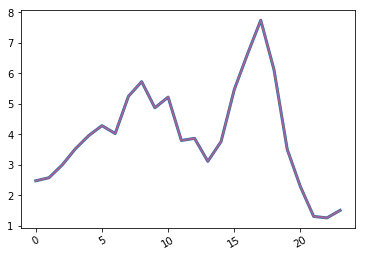

In [160]:
media(30)

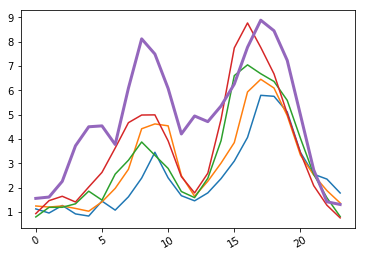

In [139]:
times = np.arange(0,24,1)
plt.plot(times, g1p['w200'].groupby(g1p.index.hour).mean())
plt.plot(times, g2p['w200'].groupby(g1p.index.hour).mean())
plt.plot(times, n1p['w200'].groupby(g1p.index.hour).mean())
plt.plot(times, n2p['w200'].groupby(g1p.index.hour).mean())
plt.plot(times, g1p['s200'].groupby(g1p.index.hour).mean(), linewidth=3)

plt.xticks(rotation=30);